In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [13]:
import pandas as pd
data = pd.read_csv('C:/Users/drago/university/23.1 semester/DL/DLmodels-tensorflow/data/student.csv')
data.isnull().sum()

data = data.loc[:,:'몸무게']
# data = data.drop(columns = '반', axis=1)
# data =data.drop(columns = '학년도', axis=1)
# data =data.drop(columns = '건강검진일', axis=1)
# data =data.drop(columns = '학교ID', axis=1)
# data =data.drop(columns = 'ID', axis=1)
# data =data.drop(columns = '최종가중치', axis=1)
# data =data.drop(columns = '도시규모', axis=1)
# data =data.drop(columns = '도시규모별분석용', axis=1)
# data =data.drop(columns = '광역시도', axis=1)
# data =data.drop(columns = '시도별', axis=1)
# data =data.drop(columns = '학년', axis=1)
# data =data.drop(columns = '학교급별', axis=1)
# data =data.drop(columns = '공학여부', axis=1)

data = data.loc[:,['학교명','성별','키','몸무게']]

In [14]:
data.loc[data["성별"] == "남", "성별"] = 0
data.loc[data["성별"] == "여", "성별"] = 1
print(data.dtypes)
print("\n\n\n\n")
data['성별'] = pd.to_numeric(data['성별'])
print(data.dtypes)
print("\n\n\n\n")

# 중간에 숫자가 섞이면서 이상해진다 문자로 대체해주자 object type 이지만 이렇게 했어야했다
data.loc[data["학교명"].str.contains("고등학교"), "학교명"] = "고등학교"
data.loc[data["학교명"].str.contains("중학교"), "학교명"] = "중학교"
data.loc[data["학교명"].str.contains("초등학교"), "학교명"] = "초등학교"

#방법1
'''
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['학교명'] = label_encoder.fit_transform(data["학교명"])
'''
#방법2
data['학교명'] = data['학교명'].astype('category').cat.codes

print(data.dtypes)
#obj = str? 

학교명     object
성별      object
키      float64
몸무게    float64
dtype: object





학교명     object
성별       int64
키      float64
몸무게    float64
dtype: object





학교명       int8
성별       int64
키      float64
몸무게    float64
dtype: object


In [70]:
# 직접 labeling 코딩 멍청했다.....
# print(data.dtypes)
# for i, a in enumerate(data['학교명']):
#     if "고등학교" in str(a):
#         data.loc[i, "학교명"] = 0
#     elif "중학교" in str(a):
#         data.loc[i, "학교명"] = 1
#     elif "초등학교" in str(a):
#         data.loc[i, "학교명"] = 2
        
# data['학교명'] = pd.to_numeric(data['학교명'])


학교명     object
성별       int64
키      float64
몸무게    float64
dtype: object


In [15]:
target =  data["학교명"]
data = data.loc[:,"성별":] #index로 할거면 iloc 써도 되었을거다

In [16]:
scaler = MinMaxScaler() #더욱 좋은 scaler 도 있었을거다
data = scaler.fit_transform(data)

In [17]:
x_train, x_test, y_train, y_test = train_test_split(
            data, target, test_size=0.2, shuffle=True, stratify=target, random_state=34)
x_train = np.array(x_train)
x_test = np.array(x_test) 
y_train = np.array(y_train) 
y_test = np.array(y_test) 

print("\n\nData Read Done!")
print("Training X Size : " + str(x_train.shape))
print("Training Y Size : " + str(y_train.shape))
print("Test X Size : " + str(x_test.shape))
print("Test Y Size : " + str(y_test.shape) + '\n\n')




Data Read Done!
Training X Size : (7745, 3)
Training Y Size : (7745,)
Test X Size : (1937, 3)
Test Y Size : (1937,)




In [18]:
import sys
from tensorflow import keras
from  tensorflow.keras.optimizers import Adam 
model = keras.Sequential([
    keras.layers.Dense(3),
    keras.layers.Dense(10, activation="relu"),
    keras.layers.Dense(10, activation="relu"),
    keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam', metrics=['accuracy'],
                  loss='sparse_categorical_crossentropy')  
print("*****************start training*************************\n\n", model.summary)
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(x_train, y_train, epochs=5, batch_size=5,
                    validation_data=(x_test, y_test),
                    callbacks=[early_stop])

*****************start training*************************

 <bound method Model.summary of <keras.engine.sequential.Sequential object at 0x0000026BE01C6DD8>>
Epoch 1/5
1549/1549 [==============================] - 1s 698us/step - loss: 0.7509 - accuracy: 0.6440 - val_loss: 0.5866 - val_accuracy: 0.7083
Epoch 2/5
1549/1549 [==============================] - 1s 576us/step - loss: 0.5736 - accuracy: 0.7238 - val_loss: 0.5698 - val_accuracy: 0.7326
Epoch 3/5
1549/1549 [==============================] - 1s 570us/step - loss: 0.5639 - accuracy: 0.7274 - val_loss: 0.5407 - val_accuracy: 0.7450
Epoch 4/5
1549/1549 [==============================] - 1s 556us/step - loss: 0.5596 - accuracy: 0.7298 - val_loss: 0.5449 - val_accuracy: 0.7414
Epoch 5/5
1549/1549 [==============================] - 1s 586us/step - loss: 0.5553 - accuracy: 0.7340 - val_loss: 0.5391 - val_accuracy: 0.7393


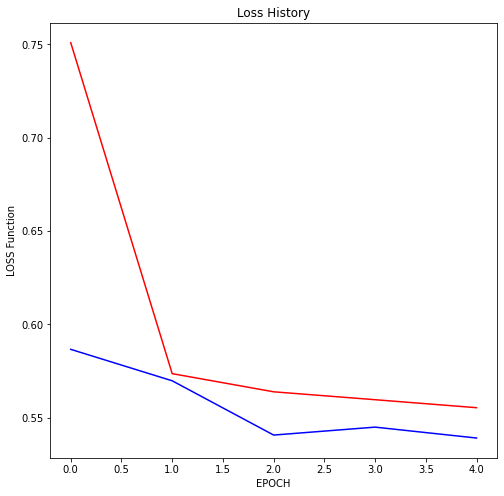

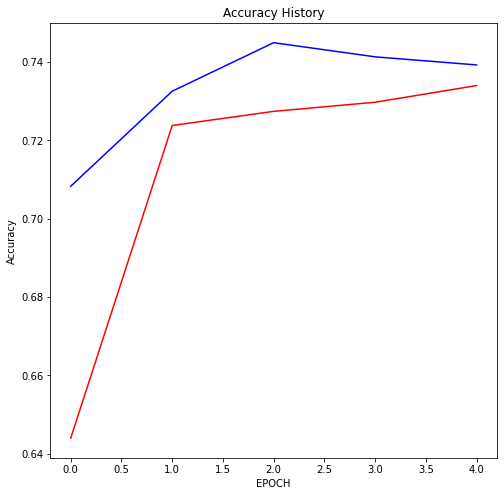

In [19]:
from matplotlib import pyplot as plt
train_history = history.history["loss"]
validation_history = history.history["val_loss"]
fig = plt.figure(figsize=(8, 8))
plt.title("Loss History")
plt.xlabel("EPOCH")
plt.ylabel("LOSS Function")
plt.plot(train_history, "red")
plt.plot(validation_history, 'blue')
fig.savefig("../../history/train_history.png")

train_history = history.history["accuracy"]
validation_history = history.history["val_accuracy"]
fig = plt.figure(figsize=(8, 8))
plt.title("Accuracy History")
plt.xlabel("EPOCH")
plt.ylabel("Accuracy")
plt.plot(train_history, "red")
plt.plot(validation_history, 'blue')
fig.savefig("../../history/accuracy_history.png")